In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import mplcursors as mpl
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\Ibad\Desktop\SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
Total_sales = round(df['Sales'].sum()/1000, 2)
Total_profit = round(df['Profit'].sum()/1000, 2)
Profit_margin =   round(Total_profit / Total_sales,2)
Average_discount = round(df['Discount'].mean(), 2)

print(f'Total Sales: {Total_sales}K\n Total Profit: {Total_profit}K\n Average Discount {Average_discount*100}%\nProfit Margin: {Profit_margin}')

Total Sales: 2297.2K
 Total Profit: 286.4K
 Average Discount 16.0%
Profit Margin: 0.12


In [6]:
state_sales = (df.groupby(['State'], as_index = False).agg(
    Sales = ('Sales' , 'sum'),
    Profit = ('Profit' , 'sum'))
    .sort_values(by = 'Sales', ascending = False))

top_10_states = state_sales.head(10)
top_10_states

,State,Sales,Profit
3,California,457687.6315,76381.3871
30,New York,310876.2710,74038.5486
41,Texas,170188.0458,-25729.3563
45,Washington,138641.2700,33402.6517
36,Pennsylvania,116511.9140,-15559.9603
8,Florida,89473.7080,-3399.3017
11,Illinois,80166.1010,-12607.8870
33,Ohio,78258.1360,-16971.3766
20,Michigan,76269.6140,24463.1876
44,Virginia,70636.7200,18597.9504


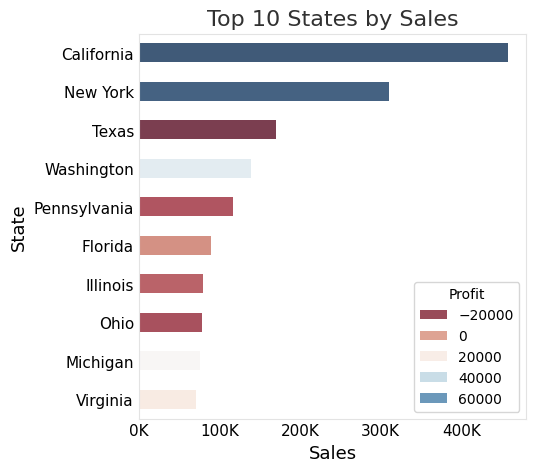

In [7]:
def top_10_chart(ax1):

    sns.barplot(top_10_states, x = 'Sales', y = 'State', orient = 'h' , hue = 'Profit', palette = 'RdBu', alpha = 0.8, ax=ax1, width = 0.5)
    
    ax1.set_title('Top 10 States by Sales', size = 16, color = '#313131')
    ax1.spines[['top', 'bottom','left', 'right']].set_color('#e3e3e3')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(100000))
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
    ax1.set_ylabel('State', size = 13)
    ax1.yaxis.set_tick_params(labelsize = 11, size = 0)
    ax1.set_xlabel('Sales', size = 13)
    ax1.xaxis.set_tick_params(labelsize = 11, size = 0)

fig, ax1 = plt.subplots(figsize = (5,5))
top_10_chart(ax1)

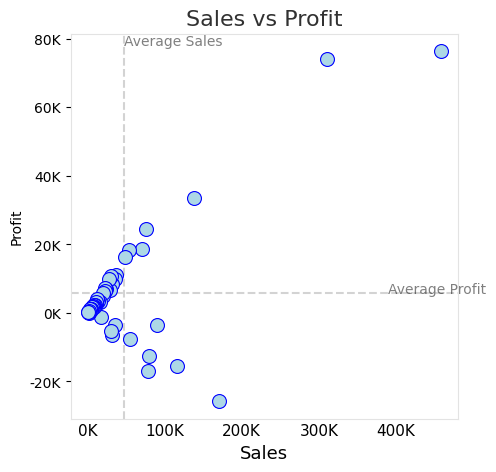

In [11]:
avg_state_sales = state_sales['Sales'].mean()
avg_state_profit = state_sales['Profit'].mean()


def scatter_plot(ax1, avg_state_sales, avg_state_profit):    
    sns.scatterplot(state_sales, x = 'Sales', y = 'Profit', color = 'lightblue', edgecolor = 'blue', s = 100,  ax= ax1, zorder = 2)
    ax1.axvline(avg_state_sales, linestyle = '--', color = 'lightgray', label = 'Average Sales', zorder = 1)
    ax1.axhline(avg_state_profit, linestyle = '--', color = 'lightgray', zorder = 1)
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
    ax1.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
    ax1.text(390000, avg_state_profit, 'Average Profit', alpha = 0.5)
    ax1.text(avg_state_sales, 78000, 'Average Sales', alpha = 0.5)
    ax1.set_title('Sales vs Profit', size = 16, color = '#313131')
    ax1.spines[['top', 'bottom', 'left', 'right']].set_color('#e3e3e3')
    ax1.set_facecolor('white')
    ax1.set_xlabel('Sales', size = 13)
    ax1.xaxis.set_tick_params(labelsize = 11, size = 0)

fig, ax1 = plt.subplots(figsize = (5,5))
scatter_plot(ax1, avg_state_sales, avg_state_profit)


In [12]:
category_sales = (df.groupby(['Category', 'Sub-Category'], as_index = False).agg(
            Sales = ('Sales', 'sum'),
            Profit = ('Profit', 'sum'))
            .sort_values(by =  'Sales', ascending = False))
category_sales['profit_margin'] = category_sales['Profit']/category_sales['Sales']

category_sales.head()

,Category,Sub-Category,Sales,Profit,profit_margin
16,Technology,Phones,330007.054,44515.7306,0.134893
1,Furniture,Chairs,328449.103,26590.1663,0.080957
11,Office Supplies,Storage,223843.608,21278.8264,0.095061
3,Furniture,Tables,206965.532,-17725.4811,-0.085645
6,Office Supplies,Binders,203412.733,30221.7633,0.148574


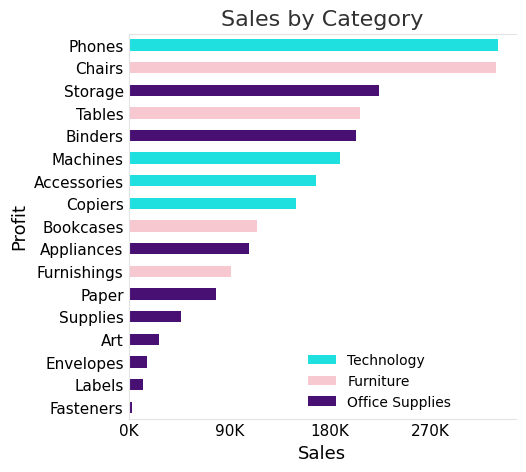

In [13]:
color_cat = {
    'Technology' : 'cyan',
    'Furniture' : 'pink',
    'Office Supplies' : 'indigo'}



def category_sales_chart(ax1):
    sns.barplot(y = category_sales["Sub-Category"], x = category_sales['Sales'], ax= ax1, 
            hue = category_sales['Category'], width = 0.5, palette = color_cat)
    ax1.set_title('Sales by Category', size = 16, color = '#313131')
    ax1.spines[['top', 'bottom','left', 'right']].set_color('#e3e3e3')
    ax1.spines['right'].set_color('none')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(20000))
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
    ax1.yaxis.set_tick_params(labelsize = 11, size = 0)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
    ax1.xaxis.set_tick_params(size = 1, labelsize = 10)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(90000))
    ax1.legend(frameon = False, loc = (0.45, 0.01))
    ax1.set_ylabel('Sub Category', size = 13)
    ax1.set_xlabel('Sales', size = 13)
    ax1.xaxis.set_tick_params(labelsize = 11, size = 0)
    ax1.set_ylabel('Profit', size = 13)
    ax1.yaxis.set_tick_params(labelsize = 11, size = 0)

fig, ax1 = plt.subplots(figsize = (5,5))
category_sales_chart(ax1)


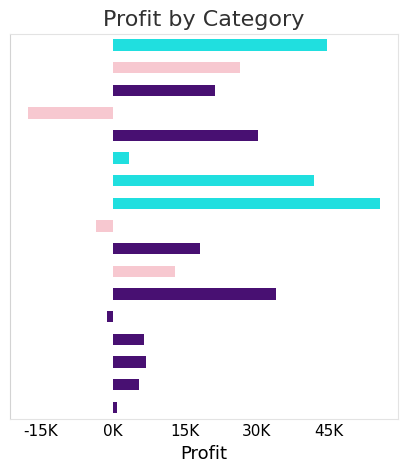

In [14]:
def category_profit_chart(ax1):
    sns.barplot(y = category_sales['Sub-Category'], x = category_sales['Profit'],  ax=ax1,
            hue = category_sales['Category'], width = 0.5, palette = color_cat)
        
    ax1.set_title('Profit by Category', size = 16, color = '#313131')
    ax1.spines[['top', 'bottom', 'right']].set_color('#e3e3e3')
    ax1.spines['left'].set_color('lightgrey')
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(20000))
    ax1.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x/1000)}K'))
    ax1.yaxis.set_visible(False)
    ax1.xaxis.set_tick_params(size = 1, labelsize = 10)
    ax1.xaxis.set_major_locator(ticker.MultipleLocator(15000))
    ax1.legend().set_visible(False)
    ax1.set_xlabel('Profit', size = 13)
    ax1.xaxis.set_tick_params(labelsize = 11, size = 0)
    # ax1.set_facecolor('white')
fig, ax1 = plt.subplots(figsize = (5,5))
category_profit_chart(ax1)

In [15]:
df_total_cities = df.groupby(['State'], as_index = False)['City'].nunique() # total cities per state
city_profit = df.groupby(['State', 'City'], as_index = False)['Profit'].sum() 

unprofit_data = city_profit[city_profit['Profit'] < 0]                          # only unprofitable cities
df_unprofit_cities = unprofit_data.groupby(['State'], as_index = False).agg(
    unprofit_city = ('City', 'nunique')
)

df_unprofit_states = df_unprofit_cities.merge(df_total_cities, how = 'left', on = 'State')

In [16]:
df_unprofit_cities['unprofit_pct'] = round((df_unprofit_cities['unprofit_city'] / df_unprofit_states['City'] * 100), 2)
df_unprofit_cities = df_unprofit_cities.sort_values(by = 'unprofit_pct', ascending = False)
df_unprofit_cities.head()

,State,unprofit_city,unprofit_pct
8,Pennsylvania,7,87.50
6,Ohio,20,83.33
4,Illinois,25,75.76
10,Texas,36,66.67
9,Tennessee,9,60.00


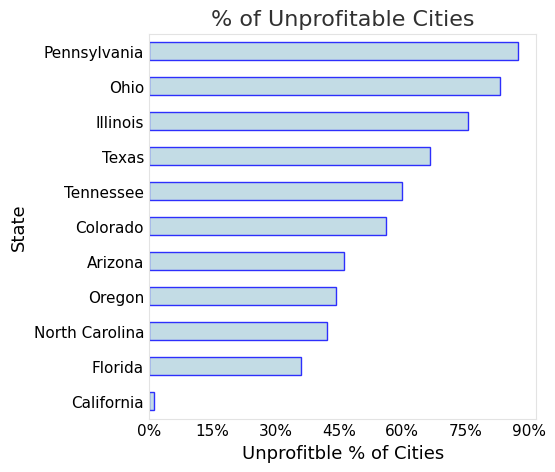

In [17]:
def unprofit_cities(ax):
    sns.barplot(df_unprofit_cities, x = 'unprofit_pct', y = 'State', orient = 'h', alpha = 0.8,
                zorder = 2, ax = ax, color = 'lightblue', edgecolor= 'blue', width = 0.5)
    ax.set_title('% of Unprofitable Cities', size = 16, color = '#313131')
    ax.spines[['top', 'bottom','left', 'right']].set_color('#e3e3e3')
    ax.set_ylabel('State', size = 13)
    ax.yaxis.set_tick_params(labelsize = 11, size = 0)
    ax.set_xlabel('Unprofitble % of Cities', size = 13)
    ax.xaxis.set_tick_params(labelsize = 11, size = 0)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(15))
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x)}%'))

fig, ax1 = plt.subplots(figsize = (5,5))
unprofit_cities(ax1)

In [18]:


def kpi_chart(ax):
    # kpi, ax = plt.subplots(figsize = (12, 2))

    y = 0.5
    # ax = plt.plot()
    ax.text(0.1, y, f'${Total_sales}K', size = 18, fontweight = 'bold')
    ax.text(0.1, y - 0.05, 'Sales', size = 12, va = 'top')
    
    
    ax.text(0.33, y, f'${Total_profit}K ', size = 18, fontweight = 'bold')
    ax.text(0.33, y - 0.05, 'Profit', size = 12, va = 'top')
    
    
    ax.text(0.66, y, f'{Average_discount*100}%', size = 18, fontweight = 'bold')
    ax.text(0.66, y - 0.05, 'Average Discount', size = 12, va = 'top')
    
    ax.text(0.9, y, f'{Profit_margin}', size = 18, fontweight = 'bold')
    ax.text(0.9, y - 0.05, 'Profit Margin', size = 12, va = 'top')

    ax.set_xlim(0,1)
    ax.set_ylim(0,1)
    
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)


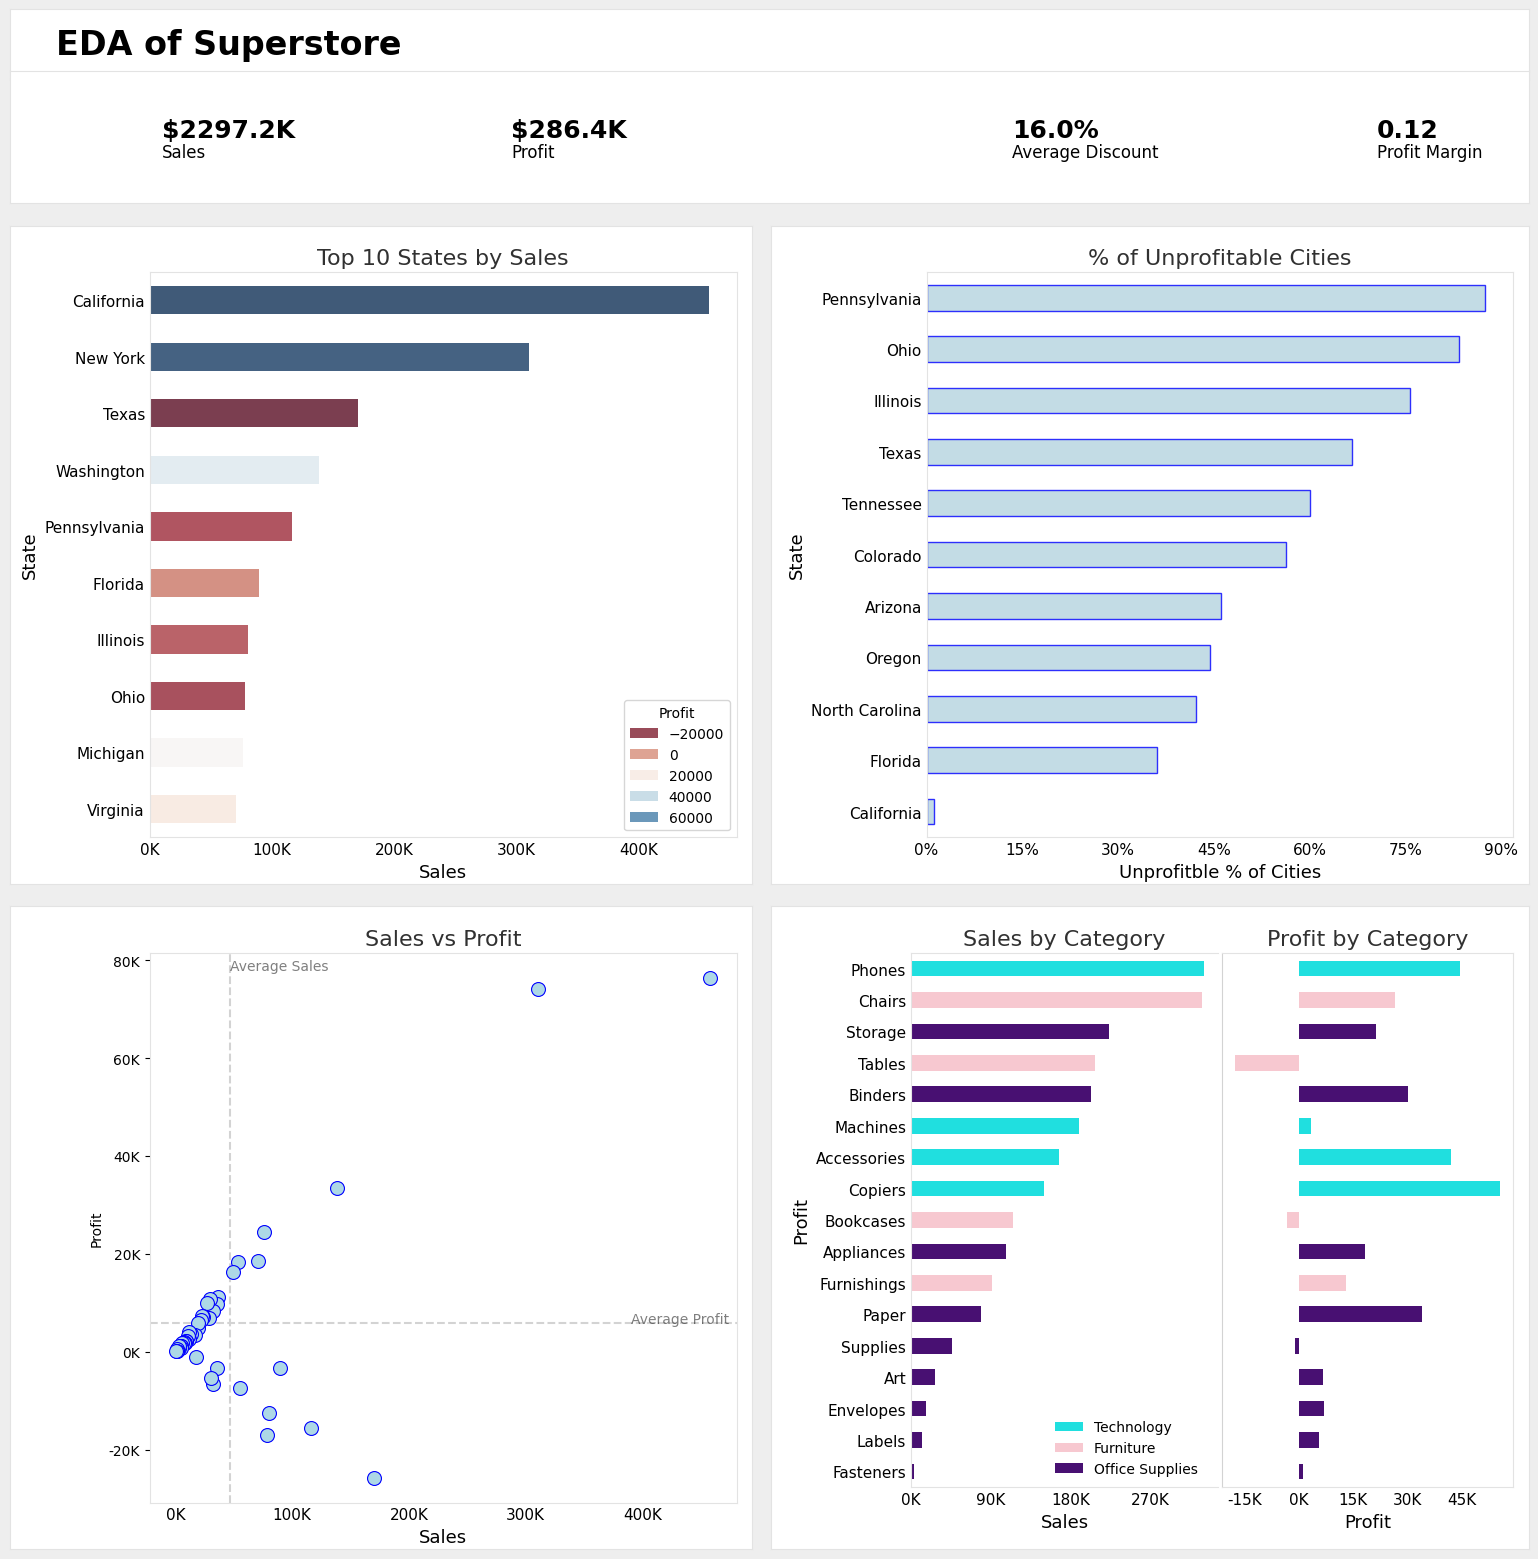

In [19]:
def remmoving_border(ax):
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    ax.spines[['top', 'bottom', 'left', 'right']].set_color('#e3e3e3')


fig = plt.figure(figsize=(20, 20), facecolor = '#eeeeee', zorder = 0)

title = plt.subplot2grid((100,100), (0,1), rowspan=5, colspan=98)
remmoving_border(title)
title.text(0.03, 0.5, 'EDA of Superstore', size = 24, fontweight = 'bold', va = 'center')
kpi = plt.subplot2grid((100,100), (4,1), rowspan=9, colspan=98)
remmoving_border(kpi)

top_10_ = plt.subplot2grid((100,100), (14,1), rowspan=43, colspan=48 )
remmoving_border(top_10_)
top_10 = plt.subplot2grid((100,100), (17,10), rowspan=37, colspan=38)

unprofit_ = plt.subplot2grid((100,100), (14, 50), rowspan=43, colspan=49)
remmoving_border(unprofit_)
unprofit = plt.subplot2grid((100,100), (17, 60), rowspan=37, colspan=38)

scatter_ = plt.subplot2grid((100,100), (58,1), rowspan=42, colspan=48 )
remmoving_border(scatter_)
scatter = plt.subplot2grid((100,100), (61, 10), rowspan=36, colspan=38)

category = plt.subplot2grid((100,100), (58,50), rowspan=43, colspan=49 )
remmoving_border(category)
cat_sales = plt.subplot2grid((100,100), (61, 59), rowspan=35, colspan=20)
cat_profit = plt.subplot2grid((100,100), (61, 79), rowspan=35, colspan=19) 


kpi_chart(kpi)
top_10_chart(top_10)
unprofit_cities(unprofit)
scatter_plot(scatter, avg_state_sales, avg_state_profit)
category_sales_chart(cat_sales)
category_profit_chart(cat_profit)


plt.subplots_adjust(wspace=0.3, hspace=0.9)  # Adjust spacing between subplots
plt.show()